In [68]:
# Importing required Libraries
import numpy as np 
import pandas as pd
import re 
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
# Loading csv dataset into the notebook
gapminder = pd.read_csv("C://Users//Naman Mittal//Desktop//Newton EDA 1 Project//gapminder_full.csv")
# displaying the first few rows of dataset
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [70]:
#1 How many countries does the dataset have?
# count of unique countries in the dataset
gapminder_unique_countries = gapminder["country"].nunique()
gapminder_unique_countries

142

In [71]:
#2 Create a pivot table that shows the average life expectancy for each continent and year.
# Index by 'continent', use 'year' as columns, and 'life_exp' as values.
pivot_table= gapminder.pivot_table( index="continent",
                             columns="year",
                             values="life_exp" , 
                             aggfunc="mean"
                            )
pivot_table

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [75]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]

high_gdp_countries = gapminder_2007[gapminder_2007['gdp_cap'] > gapminder_2007['gdp_cap'].quantile(0.75)]
result = high_gdp_countries[['country', 'gdp_cap']]
result


,country,gdp_cap
71,Australia,34435.36744
83,Austria,36126.49270
95,Bahrain,29796.04834
119,Belgium,33692.60508
251,Canada,36319.23501
407,Czech Republic,22833.30851
419,Denmark,35278.41874
527,Finland,33207.08440
539,France,30470.01670
575,Germany,32170.37442


In [76]:
gapminder_2007.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [62]:
#4  Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. 
# Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

bin_labels=['Low','Medium','High','Very High']
gapminder['Life_Exp_Range']=pd.cut(gapminder["life_exp"],
                                   bins=4,
                                   labels=bin_labels
                                  )
print(gapminder.head())
print(gapminder.tail())


       country       year  population continent  life_exp     gdp_cap  \
0  Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314   
1  Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030   
2  Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710   
3  Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138   
4  Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106   

  Life_Exp_Range Decade  
0            Low  1950s  
1            Low  1950s  
2            Low  1960s  
3            Low  1960s  
4            Low  1970s  
       country       year  population continent  life_exp     gdp_cap  \
1699  Zimbabwe 1987-01-01     9216418    Africa    62.351  706.157306   
1700  Zimbabwe 1992-01-01    10704340    Africa    60.377  693.420786   
1701  Zimbabwe 1997-01-01    11404948    Africa    46.809  792.449960   
1702  Zimbabwe 2002-01-01    11926563    Africa    39.989  672.038623   
1703  Zimbabwe 2007-01-01    12311143   

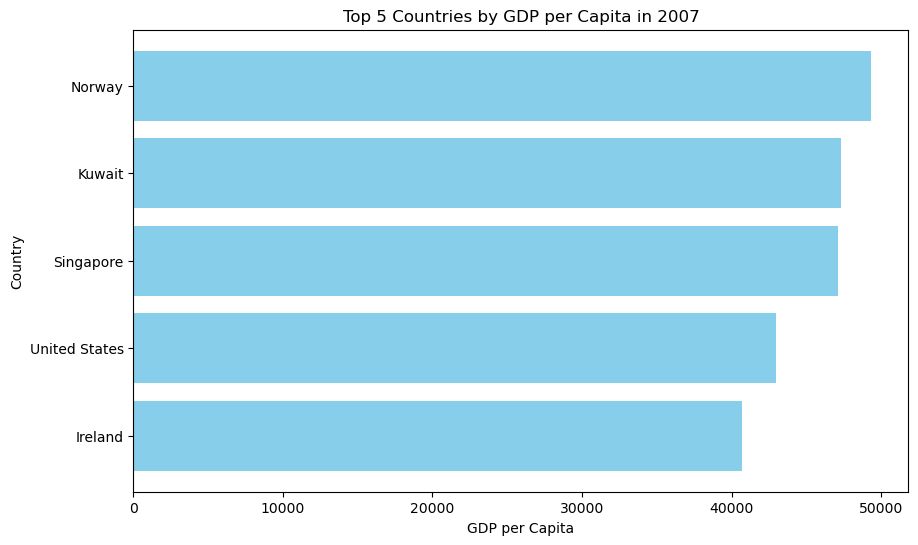

In [46]:
#5 Identify the top 5 countries with the highest GDP per capita in 2007. 
# Use a horizontal bar chart to display this data.
# Filter the data for the year 2007
gapminder_2007 = gapminder[gapminder['year'] == 2007]

# Sort the countries by GDP per capita in descending order
top_5_gdp_countries = gapminder_2007.sort_values(by='gdp_cap', ascending=False).head(5)

# Display the top 5 countries with the highest GDP per capita
top_5_gdp_countries[['country', 'gdp_cap']]
plt.figure(figsize=(10, 6))
plt.barh(top_5_gdp_countries['country'], top_5_gdp_countries['gdp_cap'], color='skyblue')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('Top 5 Countries by GDP per Capita in 2007')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest GDP at the top
plt.show()

In [47]:
#6 Find all country names that start with "I" and end with "a" using regex.
countries_with_Ia = gapminder[gapminder['country'].str.contains(r'^I.*a$', regex=True)]

# Extract and display the unique country names
unique_countries = countries_with_Ia['country'].unique()
unique_countries_list = unique_countries.tolist()
print(unique_countries_list)


['India', 'Indonesia']


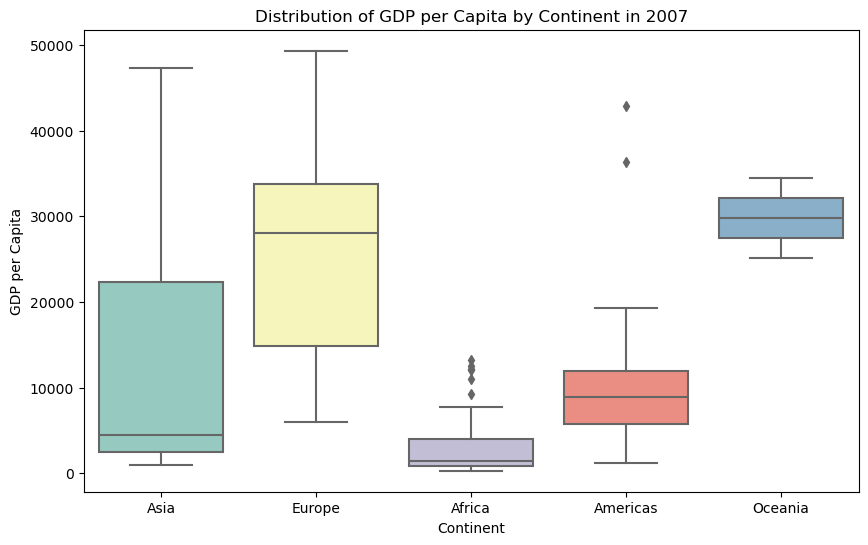

In [48]:
#7 Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.
# Filter the data for the year 2007
gapminder_2007 = gapminder[gapminder['year'] == 2007]

# Create a boxplot to compare the distribution of GDP per capita for each continent
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='gdp_cap', data=gapminder_2007, palette="Set3")
plt.title('Distribution of GDP per Capita by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()

In [49]:
#8 Find all countries with a life expectancy of over 80 years in 2007.
# List these countries and their respective continents.

# Filter the data for the year 2007 and life expectancy over 80 years
high_life_exp_countries = gapminder[(gapminder['year'] == 2007) & (gapminder['life_exp'] > 80)]
high_life_exp_countries[['country','continent']]





,country,continent
71,Australia,Oceania
251,Canada,Americas
539,France,Europe
671,"Hong Kong, China",Asia
695,Iceland,Europe
767,Israel,Asia
779,Italy,Europe
803,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


In [50]:
#9 Convert the 'year' column to a datetime type and extract the decade.
# Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).
# Convert the 'year' column to a datetime type

gapminder['year'] = pd.to_datetime(gapminder['year'], format='%Y')

# Extract the decade from the 'year' column and create a new 'Decade' column
gapminder['Decade'] = (gapminder['year'].dt.year // 10) * 10
gapminder['Decade'] = gapminder['Decade'].astype(str) + 's'

# Display the updated DataFrame
print(gapminder[['year', 'Decade']].head())

        year Decade
0 1952-01-01  1950s
1 1957-01-01  1950s
2 1962-01-01  1960s
3 1967-01-01  1960s
4 1972-01-01  1970s


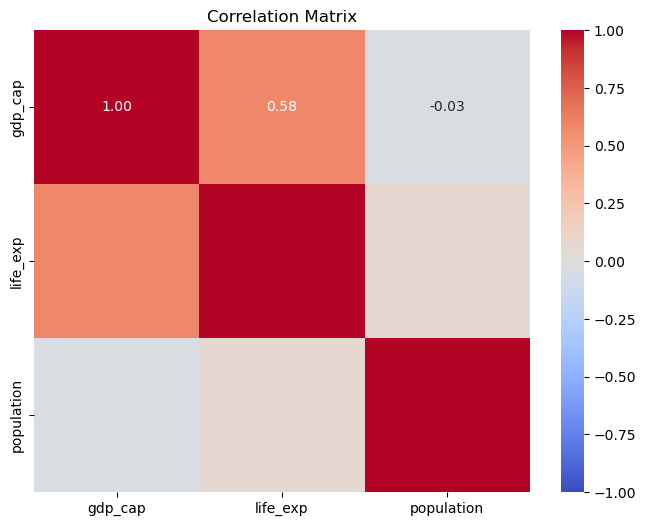

In [51]:
#10 Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. 
# Then, use Seaborn to visualize this correlation matrix as a heatmap.

# Compute the correlation matrix for GDP per capita, life expectancy, and population
correlation_matrix = gapminder[['gdp_cap', 'life_exp', 'population']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

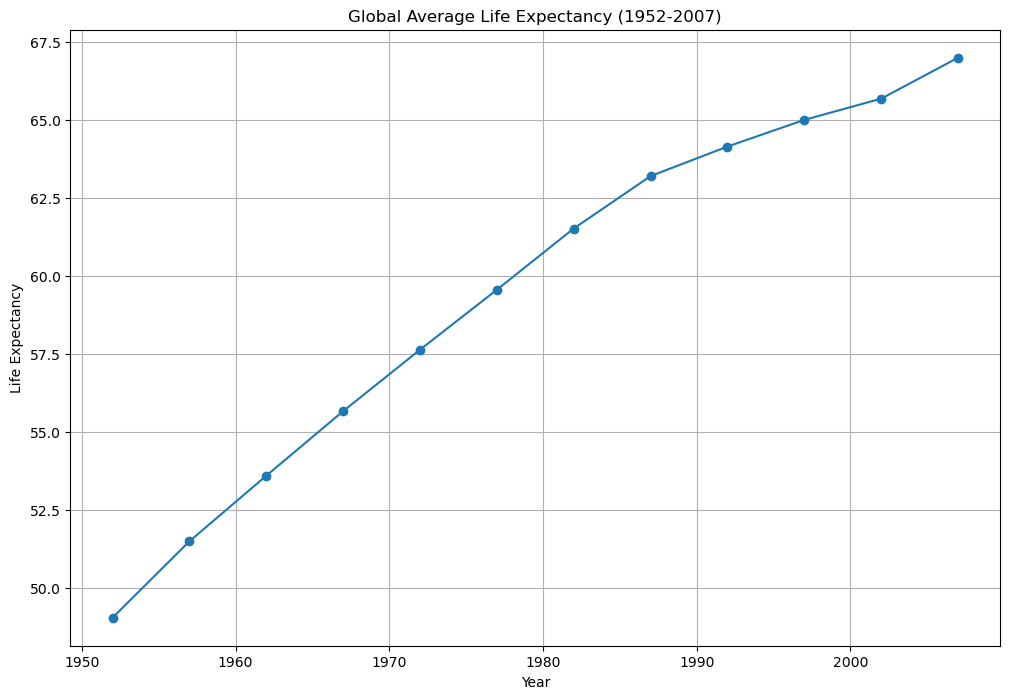

In [52]:
#11 How has the global average life expectancy changed from 1952 to 2007?
# Plot a line graph to visualize this trend.

# Calculating the global average life expectancy for each year
global_life_expectancy = gapminder. groupby('year') ['life_exp'].mean().reset_index()
# Plotting a line graph
plt.figure(figsize=(12,8))
plt.plot(global_life_expectancy['year'], global_life_expectancy['life_exp'], marker='o')
plt.title('Global Average Life Expectancy (1952-2007)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

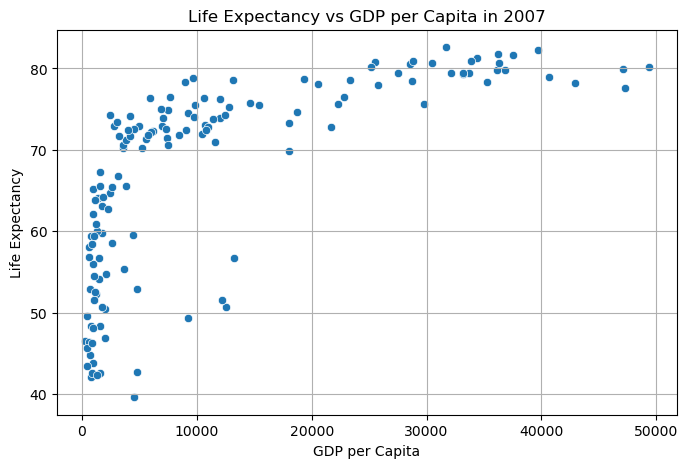

In [78]:
#12 Subjective------------------------------------------------------------
# For the year 2007, analyze the relationship between life expectancy and GDP per capita.
# Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.
# Creating a scatter plot
gapminder_2007 = gapminder[gapminder['year'] == 2007]
gapminder_2007.head()
# Plotting the scatter plot for life expectancy vs GDP per capita for 2007
plt.figure(figsize=(8,5))
sns.scatterplot(x='gdp_cap', y='life_exp', data=gapminder_2007)
plt.title('Life Expectancy vs GDP per Capita in 2007')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [77]:
gapminder_2007.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


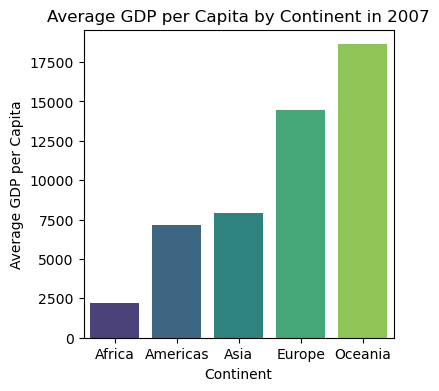

In [59]:
#13 Subjective------------------------------------------------------------
# Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.
# Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?

# Calculating average GDP per capita for each continent in 2007
average_gdp_continent = gapminder.groupby('continent') ['gdp_cap' ].mean().reset_index()
# Creating a bar chart
plt.figure(figsize=(4,4))
sns.barplot(x='continent', y='gdp_cap', data=average_gdp_continent, palette='viridis')
plt.title('Average GDP per Capita by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('Average GDP per Capita')
plt.show()

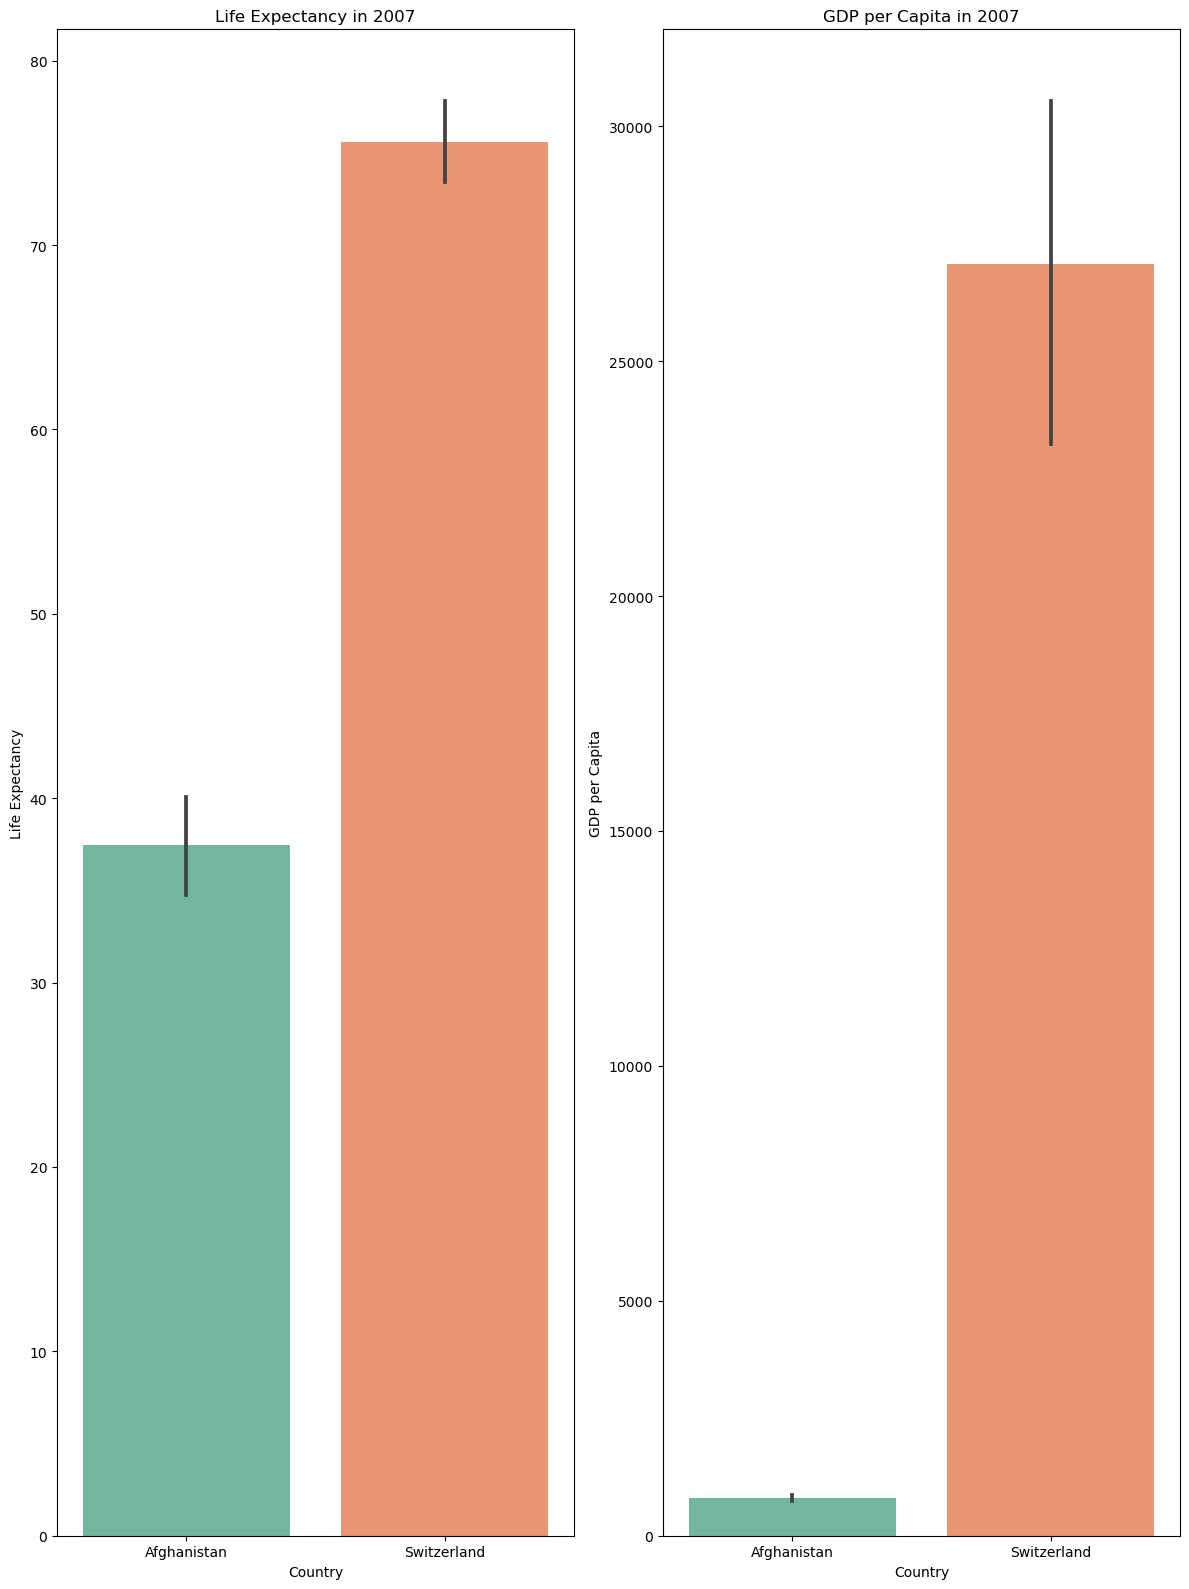

In [67]:
#14 Subjective------------------------------------------------------------
#14 Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts)
# and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
# Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
# Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.
# Subjective Question: What differences do you observe in terms of life expectancy and economic development?
# How might the stability or instability of a country influence these key metrics over time?
# Analyze the data through these visualizations and discuss your inferences.
#1st part

# Filtering dataset for Afghanistan and Switzerland for 2007
afg_swi_2007 = gapminder[gapminder['country' ].isin(['Afghanistan', 'Switzerland']) ]

# Create bar charts for life expectancy and GDP .per capita in 2007
fig, axes = plt.subplots(1, 2, figsize=(12,16))

# Life expectancy
sns.barplot(x='country', y='life_exp', data=afg_swi_2007, ax=axes[0], palette='Set2')
axes[0].set_title('Life Expectancy in 2007')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life Expectancy')

# GDP per capita
sns.barplot(x='country', y='gdp_cap', data=afg_swi_2007, ax=axes[1], palette='Set2')
axes[1].set_title('GDP per Capita in 2007')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('GDP per Capita')

plt.tight_layout ()
plt.show()

C:\Users\Naman Mittal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Naman Mittal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Naman Mittal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Naman Mittal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

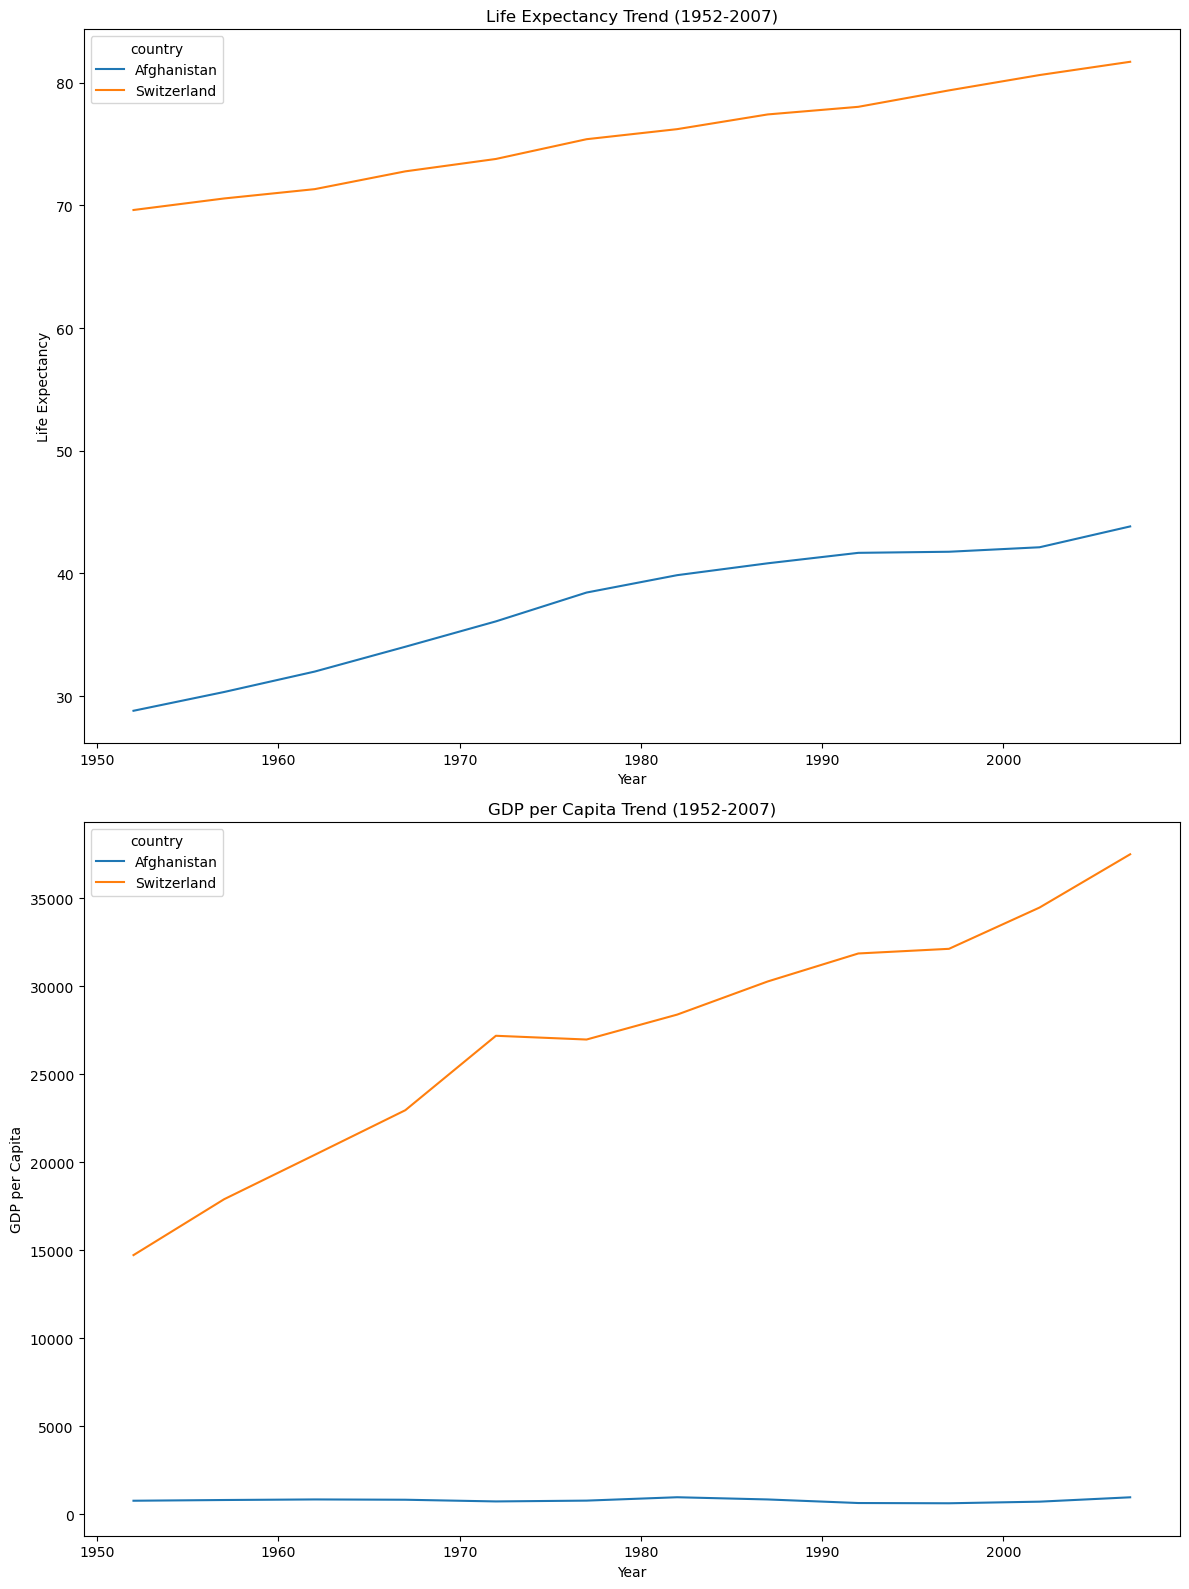

In [70]:
#2nd part

# Filtering dataset for Afghanistan and Switzerland for all years
afg_swi_all_years = gapminder[gapminder['country'].isin(['Afghanistan', 'Switzerland' ]) ]

# Creating line graphs for life expectancy and GDP per capita trends
fig, axes = plt.subplots(2, 1, figsize=(12,16))

# Life expectancy trend
sns.lineplot(x='year', y='life_exp', hue='country', data=afg_swi_all_years, ax=axes[0])
axes[0].set_title('Life Expectancy Trend (1952-2007)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy')

# GDP per capita trend
sns.lineplot(x='year', y='gdp_cap', hue='country', data=afg_swi_all_years, ax=axes[1])
axes[1].set_title('GDP per Capita Trend (1952-2007)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP per Capita')

plt.tight_layout ()
plt.show()